In [195]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import create_engine, inspect, func

In [196]:
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt


In [197]:
import pandas as pd
from pandas import DataFrame
import sqlite3
import numpy as np
from sqlalchemy import distinct
from sqlalchemy import func



**Step 3 - Climate Analysis and Exploration**

In [198]:
# Create engine 
engine = create_engine("sqlite:///hawaii.sqlite",echo=False)

In [199]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [200]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [201]:
# Print all of the classes mapped to the Base
Base.classes.keys()


['measurement', 'station']

In [202]:
Measurement = Base.classes.measurement
Station = Base.classes.station
conn = engine.connect()


In [203]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp INTEGER
tobs INTEGER


In [204]:
# Create a session
session = Session(engine)

In [205]:
inspector.get_table_names()

['measurement', 'station']

In [206]:
some_list=conn.execute("select date from measurement").fetchall()
last_date=some_list[-1]
print(last_date)

('2017-08-23',)


In [207]:
import datetime as dt
query_date = dt.date(2011, 4, 8) - dt.timedelta(days=15)

print("Start date: ", dt.date(2011, 4, 8) ," "," Finish Date: " , query_date )


Start date:  2011-04-08    Finish Date:  2011-03-24


**Precipitation Analysis**


In [208]:
results = session.query( Measurement.date, Measurement.prcp).\
     order_by(Measurement.date.desc()).all()
plot_data_df=pd.DataFrame(results)
#prcp_list=plot_df['prcp']
#plot_data_df.pop('date')
plot_df=plot_data_df.groupby(['date'])['prcp'].mean().reset_index().tail(365)
#graph_df_01=graph_df.reset_index()
#plot_org_df=plot_df.rename(columns={'prcpt':'Precipitation'}).tail(365)
plot=plot_df.rename(columns={"prcp":"Precipitation"})

#random_list=np.random.choice(date_list)
#graph_df_01=graph_df.reset_index()
date_list=plot['date']
prcp_list=plot['Precipitation']
random_list=np.random.choice(date_list,8)
random_list_sort=np.sort(random_list)[::-1]
plot.head()


,date,Precipitation
2427,2016-08-24,1.332857
2428,2016-08-25,0.077143
2429,2016-08-26,0.016667
2430,2016-08-27,0.053333
2431,2016-08-28,0.516667


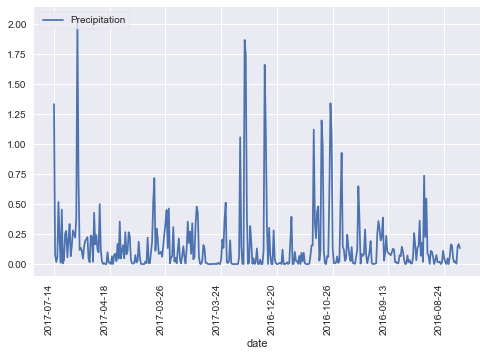

In [209]:
new_df=plot_df.plot(x=date_list,subplots=True)
#ax = fig.add_subplot(111)
#fig, ax = plt.subplots(111)
#ax.set_xticks(date)
xlabels=random_list_sort
plt.xticks(np.arange(0,365,50),xlabels, rotation = 'vertical')
plt.xlabel("date")
plt.legend(labels=['Precipitation'],loc='upper left',frameon=True)
plt.show()

**Station Analysis**


In [210]:
stations=session.query(func.count(distinct(Measurement.station))).one()
print(stations)

(9,)


In [211]:
observations=session.query(Measurement.station,func.count(Measurement.tobs)).\
             group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

print(observations)


('USC00519281', 2772)


In [212]:
temps=session.query(Measurement.station,Measurement.tobs,func.count(Measurement.tobs)).group_by(Measurement.tobs).\
      filter(Measurement.station == 'USC00519281').all()
print(temps)

[('USC00519281', 54, 1), ('USC00519281', 56, 4), ('USC00519281', 57, 6), ('USC00519281', 58, 6), ('USC00519281', 59, 5), ('USC00519281', 60, 15), ('USC00519281', 61, 19), ('USC00519281', 62, 37), ('USC00519281', 63, 33), ('USC00519281', 64, 41), ('USC00519281', 65, 71), ('USC00519281', 66, 80), ('USC00519281', 67, 111), ('USC00519281', 68, 143), ('USC00519281', 69, 193), ('USC00519281', 70, 227), ('USC00519281', 71, 265), ('USC00519281', 72, 290), ('USC00519281', 73, 278), ('USC00519281', 74, 261), ('USC00519281', 75, 204), ('USC00519281', 76, 148), ('USC00519281', 77, 111), ('USC00519281', 78, 88), ('USC00519281', 79, 54), ('USC00519281', 80, 43), ('USC00519281', 81, 22), ('USC00519281', 82, 11), ('USC00519281', 83, 3), ('USC00519281', 84, 1), ('USC00519281', 85, 1)]


In [254]:
plt_data=pd.DataFrame(temps, columns=['Station','Temperature','Frequence'])

plt_data

,Station,Temperature,Frequence
0,USC00519281,54,1
1,USC00519281,56,4
2,USC00519281,57,6
3,USC00519281,58,6
4,USC00519281,59,5
5,USC00519281,60,15
6,USC00519281,61,19
7,USC00519281,62,37
8,USC00519281,63,33
9,USC00519281,64,41


ValueError: x and y must have same first dimension, but have shapes (1,) and (31,)

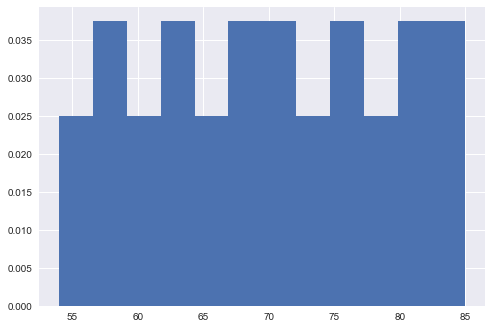

In [269]:
num_bins=12
x=plt_data["Temperature"]
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=1)
y=plt_data["Frequence"]
ax.plot(fig, y,)
plt.show()
